In [1]:
import pandas as pd

In [4]:
wine = pd.read_csv("./data/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# 데이터를 레이블과 데이터로 분리하기 ---(*1)
y = wine["quality"]
x = wine.drop("quality", axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.2)

In [9]:
y.shape

(4898,)

In [10]:
y_train.shape

(3918,)

In [11]:
y_test.shape

(980,)

In [13]:
from sklearn.ensemble import RandomForestClassifier 

# 학습하기 ---(*3)
model = RandomForestClassifier()
model.fit(x_train, y_train)

/Users/raejin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
from sklearn.metrics import accuracy_score

# 평가하기 ---(*4)
y_pred = model.predict(x_test)
#print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.6581632653061225


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.62      0.28      0.38        29
          5       0.70      0.67      0.68       308
          6       0.62      0.78      0.69       420
          7       0.71      0.48      0.57       187
          8       0.92      0.36      0.52        33
          9       0.00      0.00      0.00         1

avg / total       0.67      0.66      0.65       980



/Users/raejin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
wine = pd.read_csv("./data/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
# 품질 데이터별로 그룹을 나누고 수 세어보기
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


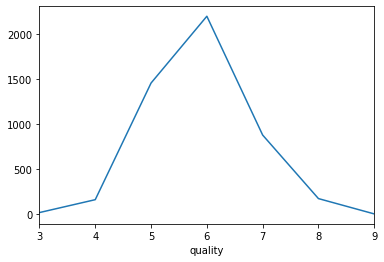

In [22]:
# 수를 그래프로 그리기
count_data.plot()
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

wine = pd.read_csv("./data/winequality-white.csv", sep=";")
wine.head()

# 학습 전용과 테스트 전용으로 분리하기
y = wine["quality"]
x = wine.drop("quality", axis=1)

# y 레이블 변경하기 --- (*2)
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

In [28]:
# 학습 전용과 테스트 전용으로 분리하기 --- (*3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 학습하기 --- (*4)
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 평가하기 --- (*5)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.24      0.35        46
          1       0.93      0.99      0.96       899
          2       0.78      0.20      0.32        35

avg / total       0.92      0.93      0.91       980

정답률= 0.9285714285714286


In [73]:
wine = pd.read_csv("./data/weather.csv", encoding="EUC_KR")
wine.head()

,저장한 날짜: 2017/10/24 11:09:57,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,서울,서울,서울
2,연월일,평균기온,평균기온,평균기온
3,NaN,NaN,품질정보,균질정보
4,2006/1/1,3.6,8,1


In [74]:
in_file = "./data/weather.csv"
out_file = "./data/tem10y.csv"

# CSV 파일을 한 줄 씩 읽어 들이기 ---(*1)
with open(in_file, "r", encoding="EUC_KR") as fr:
    lines = fr.readlines()

In [75]:
lines = ["연,월,일,기온,품질,균질\n"] + lines[5:]

In [76]:
lines

['연,월,일,기온,품질,균질\n',
 '2006/1/1,3.6,8,1\n',
 '2006/1/2,4,8,1\n',
 '2006/1/3,3.7,8,1\n',
 '2006/1/4,4,8,1\n',
 '2006/1/5,3.6,8,1\n',
 '2006/1/6,2.1,8,1\n',
 '2006/1/7,2.8,8,1\n',
 '2006/1/8,4.2,8,1\n',
 '2006/1/9,3.7,8,1\n',
 '2006/1/10,4.3,8,1\n',
 '2006/1/11,6.1,8,1\n',
 '2006/1/12,6.1,8,1\n',
 '2006/1/13,4,8,1\n',
 '2006/1/14,6.6,8,1\n',
 '2006/1/15,10.7,8,1\n',
 '2006/1/16,9,8,1\n',
 '2006/1/17,8,8,1\n',
 '2006/1/18,5.6,8,1\n',
 '2006/1/19,4.2,8,1\n',
 '2006/1/20,4,8,1\n',
 '2006/1/21,1.3,8,1\n',
 '2006/1/22,3.1,8,1\n',
 '2006/1/23,2.5,8,1\n',
 '2006/1/24,4.4,8,1\n',
 '2006/1/25,5.5,8,1\n',
 '2006/1/26,6,8,1\n',
 '2006/1/27,6.8,8,1\n',
 '2006/1/28,5.5,8,1\n',
 '2006/1/29,6,8,1\n',
 '2006/1/30,8.4,8,1\n',
 '2006/1/31,7.1,8,1\n',
 '2006/2/1,5.7,8,1\n',
 '2006/2/2,7.8,8,1\n',
 '2006/2/3,6,8,1\n',
 '2006/2/4,1.6,8,1\n',
 '2006/2/5,1.9,8,1\n',
 '2006/2/6,2,8,1\n',
 '2006/2/7,3.6,8,1\n',
 '2006/2/8,7.9,8,1\n',
 '2006/2/9,4.6,8,1\n',
 '2006/2/10,5.6,8,1\n',
 '2006/2/11,7.5,8,1\n',
 '2006/2

In [77]:
lines = map(lambda v: v.replace('/', ','), lines)

In [78]:
lines

In [79]:
result = "".join(lines).strip()
print(result)

연,월,일,기온,품질,균질
2006,1,1,3.6,8,1
2006,1,2,4,8,1
2006,1,3,3.7,8,1
2006,1,4,4,8,1
2006,1,5,3.6,8,1
2006,1,6,2.1,8,1
2006,1,7,2.8,8,1
2006,1,8,4.2,8,1
2006,1,9,3.7,8,1
2006,1,10,4.3,8,1
2006,1,11,6.1,8,1
2006,1,12,6.1,8,1
2006,1,13,4,8,1
2006,1,14,6.6,8,1
2006,1,15,10.7,8,1
2006,1,16,9,8,1
2006,1,17,8,8,1
2006,1,18,5.6,8,1
2006,1,19,4.2,8,1
2006,1,20,4,8,1
2006,1,21,1.3,8,1
2006,1,22,3.1,8,1
2006,1,23,2.5,8,1
2006,1,24,4.4,8,1
2006,1,25,5.5,8,1
2006,1,26,6,8,1
2006,1,27,6.8,8,1
2006,1,28,5.5,8,1
2006,1,29,6,8,1
2006,1,30,8.4,8,1
2006,1,31,7.1,8,1
2006,2,1,5.7,8,1
2006,2,2,7.8,8,1
2006,2,3,6,8,1
2006,2,4,1.6,8,1
2006,2,5,1.9,8,1
2006,2,6,2,8,1
2006,2,7,3.6,8,1
2006,2,8,7.9,8,1
2006,2,9,4.6,8,1
2006,2,10,5.6,8,1
2006,2,11,7.5,8,1
2006,2,12,4.6,8,1
2006,2,13,5.7,8,1
2006,2,14,10.5,8,1
2006,2,15,14.1,8,1
2006,2,16,7.5,8,1
2006,2,17,7,8,1
2006,2,18,4.4,8,1
2006,2,19,7,8,1
2006,2,20,6.4,8,1
2006,2,21,8,8,1
2006,2,22,10.8,8,1
2006,2,23,11.2,8,1
2006,2,24,6.5,8,1
2006,2,25,7.8,8,1
2006,2,26,7.5,8,

In [80]:
# 결과를 파일에 출력하기 ---(*3)
with open(out_file, "w", encoding="utf-8") as fw:
    fw.write(result)


In [81]:
import pandas as pd

In [82]:
df = pd.read_csv("./data/tem10y.csv")

In [84]:
df.head()

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1


In [85]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# 기온 데이터 읽어 들이기
df = pd.read_csv('./data/tem10y.csv', encoding="utf-8")

In [104]:
# 데이터를 학습 전용과 테스트 전용으로 분리하기 ---(*1)
train_year = (df["연"] <= 2015)
test_year = (df["연"] >= 2016)
interval = 6

In [114]:
def make_data(data):
    x = [] # 학습 데이터
    y = [] # 결과
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval: 
            continue
        y.append(temps[i])
        # 
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

In [115]:
# 직선 회귀 분석하기 ---(*3)
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 학습하기
pre_y = lr.predict(test_x) # 예측하기

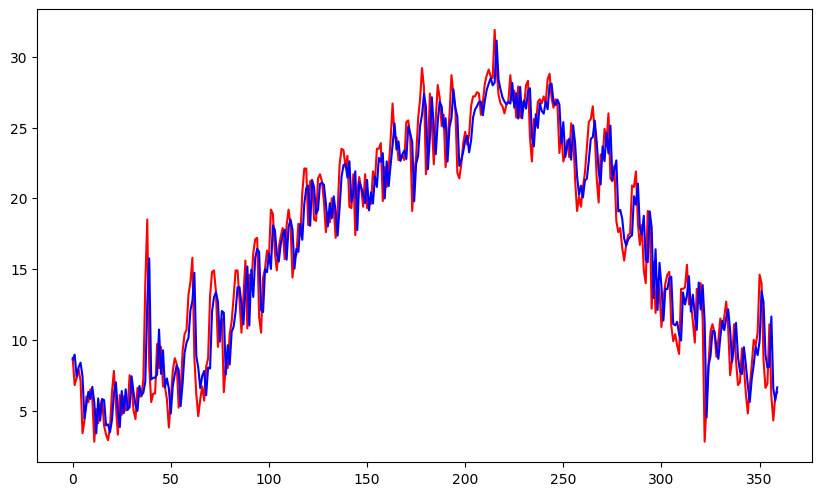

In [118]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.show()


In [120]:
import cv2

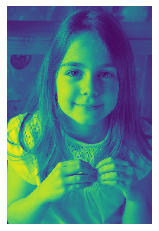

In [127]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("./assets/test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.axis('off')
plt.show()



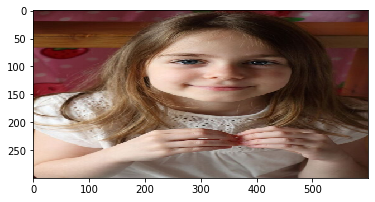

In [124]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("./assets/test.jpg")
# 이미지 크기 변경하기
im2 = cv2.resize(img, (600, 300))
# 크기 변경한 이미지 저장하기
#cv2.imwrite("out-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()


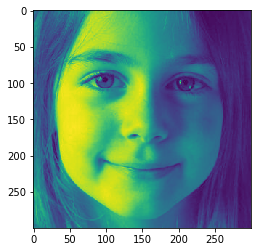

In [126]:
# 이미지 자르기
im2 = img[150:450, 150:450]
# 이미지 크기 변경하기
#im2 = cv2.resize(im2, (400, 400))
# 크기 변경한 이미지 저장하기
cv2.imwrite("cut-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY))
plt.show()




In [130]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("./assets/girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

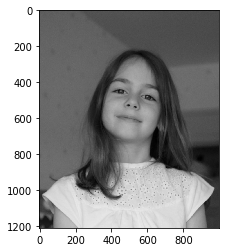

In [133]:
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))

In [156]:
cascade_file = "./data/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

In [157]:
# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("실패")
else:
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표 =", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red)

얼굴의 좌표 = 319 308 405 405


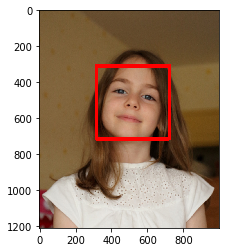

In [158]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [159]:
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2




얼굴의 좌표 = 319 308 405 405


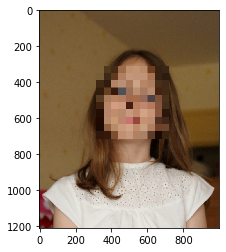

In [160]:
# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("./assets/girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cascade_file = "./data/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("실패")
else:
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표 =", x, y, w, h)
        img = mosaic(img,(x,y, x+w, y+h), 10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [165]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

# 데이터 읽어 들이기 --- (*1)
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 2차원 배열을 1차원 배열로 변환하기 --- (*2)

# 데이터를 학습 전용과 테스트 전용으로 분리하기 --- (*3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 데이터 학습하기 --- (*4)
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 예측하고 정답률 출력하기 --- (*5)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

joblib.dump(clf, 'digits.pkl')

0.9527777777777777


['digits.pkl']

In [166]:
def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    clf = joblib.load("digits.pkl")
    # 직접 그린 손글씨 이미지 읽어 들이기
    my_img = cv2.imread(filename)
    # 이미지 데이터를 학습에 적합하게 변환하기
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 # 흑백 반전
    # 2차원 배열을 1차원 배열로 변환하기
    my_img = my_img.reshape((-1, 64))
    # 데이터 예측하기
    res = clf.predict(my_img)
    return res[0]

In [167]:
# 이미지 파일을 지정해서 실행하기
n = predict_digit("./assets/my2.png")
print("my2.png = " + str(n))



my2.png = 2
